# Problem Statement

Background

Titanic was a ship which was carrying many passengers. 

Unfortunately, it got struck to an iceberg and submerged. 

Some passengers were lucky to escape and some could not escape the ship.

Data dictionary

survival: - Whether a passenger survived or not. 0=No, 1=Yes

pclass: - Ticket class of the passenger. 1=1st class, 2=2nd class, 3=3rd class

sex: - Gender of the passenger.

Age: - Age of the passenger.

sibsp: - Number of siblings or spouses on the ship.

parch: - Number of parents or children on the ship.

ticket: - Ticket number of the passenger.

fare: - Amount of fare the passenger paid.

cabin: - Cabin number of the passenger.

embarked: - Port of embarkation for the passenger. C=Cherbourg, Q=Queenstown, S=Southampton

# Hypothesis Generation

1. Passenger with higher ticket class may have higher chance to get saved.

2. Female passengers may have higher chance to get saved.

3. Young and old passengers may be preferred during survival operation over mid age passengers.

# Type of problem

This is a Binary classification problem, with target variable: - survival.
    
Survival=1; the passenger survived.

Survival=0; the passenger did not survived. 

# Loading the packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
#Creating copy of the dataset
train_original=train.copy()
test_original=test.copy()

# Understanding the data

In [4]:
#Fetching the list of columns in the dataset
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Fetching the datatype of each column
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Following are integer data: -

PassengerId, 
Survived,
Pclass,
SibSp,
Parch

Following are strings: -

Name,
Sex,
Ticket,
Cabin,
Embarked

Following are float data: -

Age,
Fare

In [6]:
#Fetching number of rows and columns
train.shape

(891, 12)

Training dataset has: -

891 rows

12 columns

# Univariate Analysis

In [8]:
#We will find frequency distribution of target variable: Survived
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Out of 891 passengers: -

549 passengers did not survived.

342 passengers survived.

In [9]:
#We will find normalized frequency distribution of target variable: Survived.
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Out of 891 passengers: -

Around 62% did not survived.

Around 38% survived.

Now we will find normalized frequency distribution on independent variables.

In [10]:
#Pclass
train['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

Around 24% of passengers are having 1st class ticket.

Around 21% of passengers are having 2nd class ticket.

Around 55% of passengers are having 3rd class ticket.

Thus, half the number of passengers are travelling on 3rd class ticket.

In [11]:
#Sex
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

Out of 891 passengers: -

Around 65% are male.

Around 35% are female.

In [12]:
#Age
train['Age'].value_counts(normalize=True)

24.00    0.042017
22.00    0.037815
18.00    0.036415
28.00    0.035014
19.00    0.035014
           ...   
55.50    0.001401
74.00    0.001401
0.92     0.001401
70.50    0.001401
12.00    0.001401
Name: Age, Length: 88, dtype: float64

<AxesSubplot:>

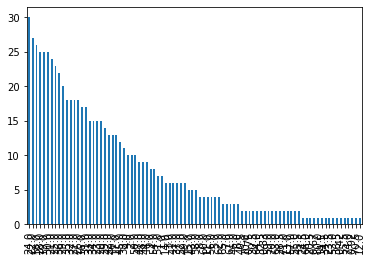

In [13]:
train['Age'].value_counts().plot.bar()

Univariate analysis based on age of passengers is not possible at this point.

In [14]:
#SibSp
train['SibSp'].value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

Out of 891 passengers: -

Around 68% of passengers do not have any siblings or spouses on the ship.

Around 23% of passengers have 1 sibling or spouse on the ship.

Around 3% of passengers have 2 siblings or spouse on the ship.

Around 1% of the passengers have 3 siblings or spouse on the ship.

Around 2% of the passengers have 4 siblings or spouse on the ship.

Around 0.5% of the passengers have 5 siblings or spouse on the ship.

Around 0.7% of the passengers have 8 siblings or spouse on the ship.

Thus: -

Maximum number of passengers do not have any siblings or spouse on the ship.

In [15]:
#Parch

In [16]:
train['Parch'].value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
3    0.005612
5    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

Around 76% of the passengers do not have any parents or children on the ship.

Around 13% of the passengers have 1 parent or child on the ship.

Around 9% of the passengers have 2 parents or children on the ship.

Around 1.5% of the passengers have 3 to 6 parents or children on the ship.

Thus: -

Maximum passengers do not have parents or children with them on the ship. 

In [17]:
#Embarked
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

Around 72% of passengers came from Southampton

Around 19% of passengers came from Cherbourg

Around 9% of passengers came from Queenstown

<AxesSubplot:xlabel='Fare', ylabel='Density'>

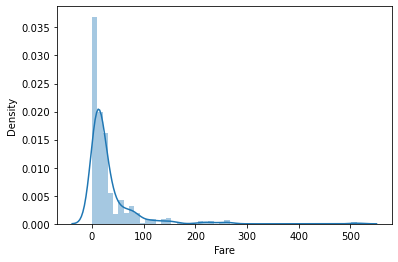

In [18]:
sns.distplot(train['Fare'])

Maximum number of passengers are having ticket with price below 100.

# Bivariate Analysis

Here, we will try to check our hypothesis if it stands valid or not.

In [19]:
#Relation of feature Pclass with target variable: Survived.
TicketClass=pd.crosstab(train['Pclass'],train['Survived'])

In [20]:
print(TicketClass)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


<AxesSubplot:xlabel='Pclass'>

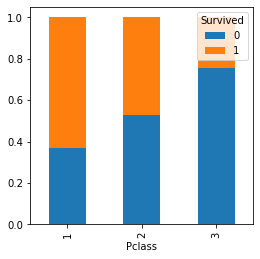

In [22]:
TicketClass.div(TicketClass.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

Here from the crosstab results we can infer: -

Out of 216 passengers having 1st class ticket, 80 did not survived and 136 survived.

Out of 184 passengers having 2nd class ticket, 97 did not survived and 87 survived.

Out of 491 passengers having 3rd class ticket, 372 did not survived and 119 survived.


From the bar chart we can say higher the ticket class of the passenger, higher is the chance of survival. 

Thus, relatively least number of passengers survived having 3rd class ticket and relatively most number of passengers survived having 1st class ticket.

Thus, our hypothesis "Passenger with higher ticket class may have higher chance to get saved." is valid.

In [23]:
#Relation of feature Sex with target feature: Survived.
Gender=pd.crosstab(train['Sex'],train['Survived'])
print(Gender)

Survived    0    1
Sex               
female     81  233
male      468  109


<AxesSubplot:xlabel='Sex'>

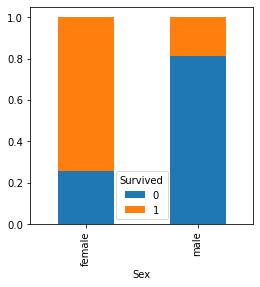

In [25]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

Here from crosstab results we can infer: -

Out of 314 female passengers, 81 did not survived and 233 survived.

Out of 577 male passengers, 468 did not survived and 109 survived.


From the bar chart we can say that female passengers have relativery very high chance of survival than male passengers.

Thus, our hypothesis "Female passengers may have higher chance to get saved." is valid. 